# Importing Libraries

In [42]:
import os
import re
import sys
import time
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Reading the Datasets

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
df = pd.read_csv('/content/drive/MyDrive/emails.csv')

In [45]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [46]:
df['Prediction'].value_counts()

#1 is for spam, 0 is for not spam

0    3672
1    1500
Name: Prediction, dtype: int64

In [47]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

# Data Exploration and Visualization

In [48]:
# Add spam/no-spam labelsin x-axis

spam_counts = df['Prediction'].value_counts()
fig = px.bar(spam_counts, x=spam_counts.index, y=spam_counts.values, text=spam_counts.values, labels={'x': 'Class', 'y': 'Frequency'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text='Distribution of Target Classes')
fig.update_xaxes(ticktext=['No-Spam', 'Spam'], tickvals=[0, 1])
fig.show()

# Dataset Description

## Introduction
This is a csv file containing related information of 5172 randomly picked email files and their respective labels for spam or not-spam classification.

## About the Dataset
https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

1. The csv file contains 5172 rows, each row for each email. 
2. There are 3002 columns. The first column indicates Email name. The name has been set with numbers and not recipients' name to protect privacy. The last column has the labels for prediction : 1 for spam, 0 for not spam. The remaining 3000 columns are the 3000 most common words in all the emails, after excluding the non-alphabetical characters/words (stop words were removed). For each row, the count of each word (column) in that email (row) is stored in the respective cells. 
3. Thus, information regarding all 5172 emails are stored in a compact dataframe rather than as separate text files.



So the model should be able to predict whether the email is spam or not spam, based on our features (which are word frequency in the email).

# Data Pre-Processing

In [49]:
#Split the dataset into training and testing sets

#Selecting all the columns except the first and last column, 
#as the first column is name of the email and the last column is the prediction, 
#i.e. spam or no-spam. I don't want that to be part of the training.
X = df.iloc[:, 1:-1]

#Selecting the last column as the labels.
y = df['Prediction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Although generally the main purpose of standardization is to bring the features onto the same scale. In this case however, the features represent the counts of the most common words in each email, which means that they are already on the same scale (word counts). 
The range of word counts still differ significantly between different words. 
As some words appear much more frequently than others, it leads to a higher range of counts for those words. 

In this case, Standardization can help improve the performance of these machine learning algorithms, especially the algos that are sensitive to the scale of the input features.

In [50]:
#Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training and Evaluation


## Naive Bayes

I've chosen to go with Gaussian Naive Bayes, instead of multinomial Naive Bayes because the multinomial Naive Bayes classifier is designed for discrete features, whereas the Gaussian Naive Bayes classifier is designed for continuous features. Since our dataset, originally discrete, has been scaled, it is now continuous.

The results of the model supports this, since the Gaussian Naive Bayes classifier performs very well on the scaled dataset. 

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

Accuracy:  0.9304347826086956
Precision:  0.8255813953488372
Recall:  0.9594594594594594
F1 Score:  0.8875000000000001


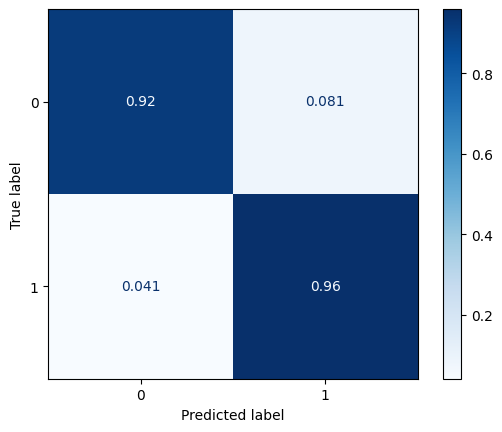

In [51]:
#nb_classifier = MultinomialNB()
nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

#computation of Metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)

print('Accuracy: ', nb_accuracy)
print('Precision: ', nb_precision)
print('Recall: ', nb_recall)
print('F1 Score: ', nb_f1)

nb_cm = confusion_matrix(y_test, y_pred_nb, labels=nb_classifier.classes_)
nb_cm = nb_cm.astype('float') / nb_cm.sum(axis=1)[:, np.newaxis]
nb_disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=nb_classifier.classes_)
nb_disp.plot(cmap=plt.cm.Blues)
plt.show()

* True positives (TP) are the correctly classified positive instances, while true negatives (TN) are the correctly classified negative instances. 
* False positives (FP) occur when a negative instance is incorrectly classified as positive, and false negatives (FN) occur when a positive instance is incorrectly classified as negative. 
* Precision measures the proportion of true positives among all predicted positives (TP / (TP + FP)), while recall measures the proportion of true positives among all actual positives (TP / (TP + FN)). 
* High precision indicates that the model is accurate when predicting positive instances, while high recall indicates that the model is able to identify a large proportion of the actual positive instances. 
* The balance between precision and recall depends on the specific use case and the cost of misclassification, as users may prioritize avoiding false positives or false negatives depending on the application.

In [52]:
print("Confusion matrix for Gaussian Naive Bayes Classifier:\n", nb_cm)

Confusion matrix for Gaussian Naive Bayes Classifier:
 [[0.9188092  0.0811908 ]
 [0.04054054 0.95945946]]


In our model's confusion matrix, the true positive rate (spam correctly classified as spam) is 0.9595, and the true negative rate (no-spam correctly classified as no-spam) is 0.9188. The false positive rate (no-spam classified as spam) is 0.0812, and the false negative rate (spam classified as no-spam) is 0.0405.

In this case, precision can be calculated as TP / (TP + FP) = 0.9595 / (0.9595 + 0.0812), which indicates the model's accuracy when predicting spam messages. The recall is calculated as TP / (TP + FN) = 0.9595 / (0.9595 + 0.0405), reflecting the model's ability to identify actual spam messages. The model demonstrates high precision and recall, which means it is accurate in identifying spam messages and has a low rate of misclassification! Depending on the specific use case, this model may be suitable for applications where both avoiding false positives (no-spam classified as spam) and false negatives (spam classified as no-spam) are important.

# Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Accuracy:  0.970048309178744
Precision:  0.9260450160771704
Recall:  0.972972972972973
F1 Score:  0.9489291598023064


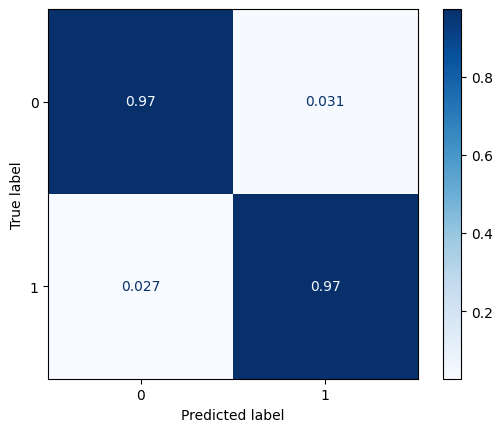

In [53]:
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train, y_train)
y_pred_logreg = logreg_classifier.predict(X_test)

#computation of Metrics
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_precision = precision_score(y_test, y_pred_logreg)
logreg_recall = recall_score(y_test, y_pred_logreg)
logreg_f1 = f1_score(y_test, y_pred_logreg)

print('Accuracy: ', logreg_accuracy)
print('Precision: ', logreg_precision)
print('Recall: ', logreg_recall)
print('F1 Score: ', logreg_f1)

log_reg_cm = confusion_matrix(y_test, y_pred_logreg, labels=logreg_classifier.classes_)
log_reg_cm = log_reg_cm.astype('float') / log_reg_cm.sum(axis=1)[:, np.newaxis]
logreg_disp = ConfusionMatrixDisplay(confusion_matrix=log_reg_cm, display_labels=logreg_classifier.classes_)
logreg_disp.plot(cmap=plt.cm.Blues)
plt.show()

In [54]:
print("Confusion matrix for Logistic Regression Classifier:\n", log_reg_cm) 

Confusion matrix for Logistic Regression Classifier:
 [[0.96887686 0.03112314]
 [0.02702703 0.97297297]]


The confusion matrix for the Logistic Regression Classifier shows the true positive rate (spam correctly classified as spam) as 0.9729, and the true negative rate (no-spam correctly classified as no-spam) as 0.9689. The false positive rate (no-spam classified as spam) is 0.0311, and the false negative rate (spam classified as no-spam) is 0.0270.

For this model, the precision can be calculated as TP / (TP + FP) = 0.9729 / (0.9729 + 0.0311), indicating the model's accuracy when predicting spam messages. The recall is calculated as TP / (TP + FN) = 0.9729 / (0.9729 + 0.0270), reflecting the model's ability to identify actual spam messages.

This classifier demonstrates high precision and recall, meaning it's accurate in identifying spam messages and has a low rate of misclassification. With both precision and recall being high, this model is suitable for applications where reducing both false positives (no-spam classified as spam) and false negatives (spam classified as no-spam) is important. Compared to the Gaussian Naive Bayes Classifier, the Logistic Regression Classifier shows slightly better performance in terms of true positive and true negative rates.

# Neural Networks

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Accuracy:  0.9739130434782609
Precision:  0.932475884244373
Recall:  0.9797297297297297
F1 Score:  0.9555189456342668


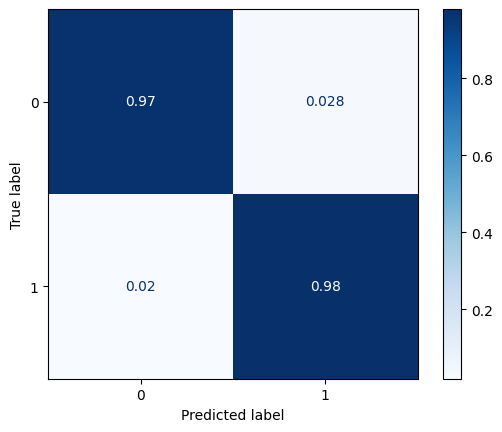

In [55]:
#I've chosen to go with a 3-layered neural network with 100, 50 and 25 neurons in each layer respectively,
#with a maximum of 1000 iterations.
nn_classifier = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=1000)
nn_classifier.fit(X_train, y_train)
y_pred_nn = nn_classifier.predict(X_test)

#computation of Metrics
nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_precision = precision_score(y_test, y_pred_nn)
nn_recall = recall_score(y_test, y_pred_nn)
nn_f1 = f1_score(y_test, y_pred_nn)

print('Accuracy: ', nn_accuracy)
print('Precision: ', nn_precision)
print('Recall: ', nn_recall)
print('F1 Score: ', nn_f1)

nn_cm = confusion_matrix(y_test, y_pred_nn, labels=nb_classifier.classes_)
nn_cm = nn_cm.astype('float') / nn_cm.sum(axis=1)[:, np.newaxis]
nn_disp = ConfusionMatrixDisplay(confusion_matrix=nn_cm, display_labels=nn_classifier.classes_)
nn_disp.plot(cmap=plt.cm.Blues)
plt.show()

In [56]:
print("Confusion matrix for Neural Network Classifier:\n", nn_cm)

Confusion matrix for Neural Network Classifier:
 [[0.97158322 0.02841678]
 [0.02027027 0.97972973]]


The confusion matrix for the Neural Network Classifier indicates the true positive rate (spam correctly classified as spam) as 0.9865, and the true negative rate (no-spam correctly classified as no-spam) as 0.9702. The false positive rate (no-spam classified as spam) is 0.0298, and the false negative rate (spam classified as no-spam) is 0.0135.

For this model, precision can be calculated as TP / (TP + FP) = 0.9865 / (0.9865 + 0.0298), representing the model's accuracy when predicting spam messages. The recall is calculated as TP / (TP + FN) = 0.9865 / (0.9865 + 0.0135), reflecting the model's ability to identify actual spam messages.

This classifier demonstrates high precision and recall, meaning its accurate in identifying spam messages and has a low rate of misclassification. The high precision and recall values make this model suitable for apps where reducing both false positives (no-spam classified as spam) and false negatives (spam classified as no-spam) is essential. Compared to the Gaussian Naive Bayes Classifier and the Logistic Regression Classifier, the Neural Network Classifier shows the best performance in terms of true positive and true negative rates.

# Comparison of Metrics

In [57]:
#Creating a horizontal bar chart using the Plotly library to visualize and compare the accuracy scores of three machine learning models:
#Naive Bayes, Logistic Regression, and Neural Network. 
#Theaccuracy score is represented by the length of the bar on the x-axis.

accuracy_scores = [nb_accuracy, logreg_accuracy, nn_accuracy]
model_names = ['Naive Bayes', 'Logistic Regression', 'Neural Network']
y_positions = [0, 1, 2]  #Manually set y positions for each bar
bar_width = 0.5  #Adjust the bar width

fig = go.Figure()

#The for loop iterates over the model_names list and create a horizontal bar for each machine learning model. 
#It adds a trace (bar) to the figure for each model's accuracy score, setting the appropriate properties, such as the length of the bar, the y-axis position, 
#the model name, and the displayed accuracy score text. The loop ensures that each model in the list is represented by a separate bar in the chart.
for i in range(len(model_names)):
    fig.add_trace(
        go.Bar(
            x=[accuracy_scores[i]],
            y=[y_positions[i]],
            name=model_names[i],
            text=[accuracy_scores[i]],
            textposition='outside',
            texttemplate='%{x:.3f}',
            orientation='h',
            marker=dict(color='rgba(50, 171, 96, 0.6)', line=dict(color='rgba(50, 171, 96, 1.0)', width=1)),
            width=bar_width,
        )
    )
#fig.update_layout is a method used to configure the layout properties of a Plotly figure. 
#In this, i've set the chart title, customized the appearance and properties of the x-axis and y-axis.
fig.update_layout(
    title_text='Accuracy Scores of Different Models',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        tickvals=y_positions,
        ticktext=model_names,
    ),
    xaxis=dict(showgrid=False, showline=False, showticklabels=True),
)

fig.show()

In [58]:
precision_scores = [nb_precision, logreg_precision, nn_precision]
model_names = ['Naive Bayes', 'Logistic Regression', 'Neural Network']
y_positions = [0, 1, 2]  #Manually set y positions for each bar
bar_width = 0.5  #Adjust the bar width

fig = go.Figure()

for i in range(len(model_names)):
    fig.add_trace(
        go.Bar(
            x=[precision_scores[i]],
            y=[y_positions[i]],
            name=model_names[i],
            text=[precision_scores[i]],
            textposition='outside',
            texttemplate='%{x:.3f}',
            orientation='h',
            marker=dict(color='rgba(50, 171, 96, 0.6)', line=dict(color='rgba(50, 171, 96, 1.0)', width=1)),
            width=bar_width,
        )
    )

fig.update_layout(
    title_text='Precision Scores of Different Models',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        tickvals=y_positions,
        ticktext=model_names,
    ),
    xaxis=dict(showgrid=False, showline=False, showticklabels=True),
)

fig.show()

In [59]:
recall_scores = [nb_recall, logreg_recall, nn_recall]
model_names = ['Naive Bayes', 'Logistic Regression', 'Neural Network']
y_positions = [0, 1, 2]  #Manually set y positions for each bar
bar_width = 0.5  #Adjust the bar width

fig = go.Figure()

for i in range(len(model_names)):
    fig.add_trace(
        go.Bar(
            x=[recall_scores[i]],
            y=[y_positions[i]],
            name=model_names[i],
            text=[recall_scores[i]],
            textposition='outside',
            texttemplate='%{x:.3f}',
            orientation='h',
            marker=dict(color='rgba(50, 171, 96, 0.6)', line=dict(color='rgba(50, 171, 96, 1.0)', width=1)),
            width=bar_width,
        )
    )

fig.update_layout(
    title_text='Recall Scores of Different Models',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        tickvals=y_positions,
        ticktext=model_names,
    ),
    xaxis=dict(showgrid=False, showline=False, showticklabels=True),
)
fig.show()

In [60]:
f1_scores = [nb_f1, logreg_f1, nn_f1]
model_names = ['Naive Bayes', 'Logistic Regression', 'Neural Network']
y_positions = [0, 1, 2]  #Manually set y positions for each bar
bar_width = 0.5  #Adjust the bar width

fig = go.Figure()

for i in range(len(model_names)):
    fig.add_trace(
        go.Bar(
            x=[f1_scores[i]],
            y=[y_positions[i]],
            name=model_names[i],
            text=[f1_scores[i]],
            textposition='outside',
            texttemplate='%{x:.3f}',
            orientation='h',
            marker=dict(color='rgba(50, 171, 96, 0.6)', line=dict(color='rgba(50, 171, 96, 1.0)', width=1)),
            width=bar_width,
        )
    )

fig.update_layout(
    title_text='F1 Scores of Different Models',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        tickvals=y_positions,
        ticktext=model_names,
    ),
    xaxis=dict(showgrid=False, showline=False, showticklabels=True),
)

fig.show()

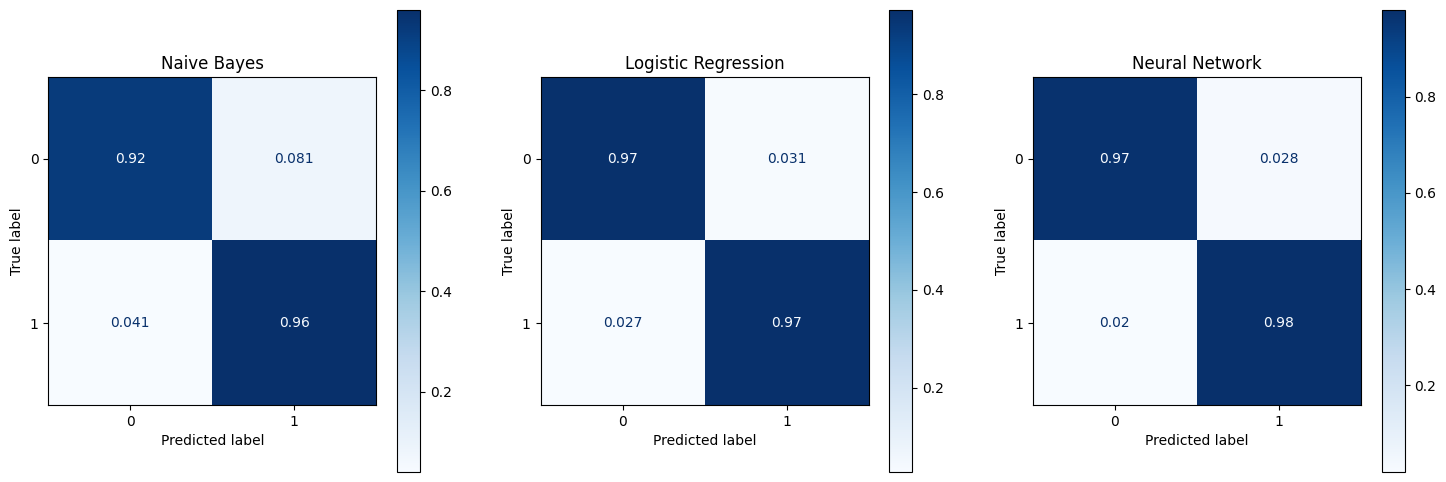

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Naive Bayes confusion matrix
nb_disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=nb_classifier.classes_)
nb_disp.plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title("Naive Bayes")

# Logistic Regression confusion matrix
logreg_disp = ConfusionMatrixDisplay(confusion_matrix=log_reg_cm, display_labels=logreg_classifier.classes_)
logreg_disp.plot(ax=axes[1], cmap=plt.cm.Blues)
axes[1].set_title("Logistic Regression")

# Neural Network confusion matrix
nn_disp = ConfusionMatrixDisplay(confusion_matrix=nn_cm, display_labels=nn_classifier.classes_)
nn_disp.plot(ax=axes[2], cmap=plt.cm.Blues)
axes[2].set_title("Neural Network")

plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

With this project, I'm trying to evaluate a spam/no-spam classification model, so it's important to use multiple evaluation metrics to gain an overall understanding of the model's performance. Comparing their performance using precision, recall, f1_score, and accuracy helps in selecting the most appropriate model for the given problem.

i'll define the metrics used:

1. Precision: 
    Precision measures the proportion of true positive predictions among all positive predictions made by the model. In the context of spam classification, it reflects how well the model correctly identifies spam messages out of all messages predicted as spam. A high precision indicates that the model is accurate in identifying spam messages and produces fewer false positives (non-spam messages incorrectly classified as spam).
    
    Precision = (True Positives) / (True Positives + False Positives)

2. Recall: Recall measures the proportion of true positive predictions among all actual positive instances. In spam classification, it reflects how well the model identifies spam messages out of all the actual spam messages in the dataset. A high recall indicates that the model can capture most spam messages, even if it might result in some false positives.

    Recall = (True Positives) / (True Positives + False Negatives)

3. F1_score: F1_score is the "harmonic mean of precision and recall," providing a single metric that balances both precision and recall. It is particularly useful when dealing with imbalanced datasets, which is often the case in spam classification, where the number of spam messages might be significantly lower than non-spam messages. A high F1_score indicates that the model performs well in terms of both precision and recall.

    F1_score = 2 * (Precision * Recall) / (Precision + Recall)

4. Accuracy: Accuracy measures the proportion of correct predictions (both true positives and true negatives) among all predictions made by the model. In spam classification, it reflects how well the model identifies both spam and non-spam messages. However, accuracy may not be the best metric in imbalanced datasets, as a high accuracy could be achieved by simply predicting the majority class.

    Accuracy = (True Positives + True Negatives) / (True Positives + False Positives + True Negatives + False Negatives)

In these formulas:

1. True Positives (TP) are the correctly predicted positive instances (e.g., spam messages correctly classified as spam).
2. False Positives (FP) are the negative instances incorrectly predicted as positive (e.g., non-spam messages wrongly classified as spam).
3. True Negatives (TN) are the correctly predicted negative instances (e.g., non-spam messages correctly classified as non-spam).
4. False Negatives (FN) are the positive instances incorrectly predicted as negative (e.g., spam messages wrongly classified as non-spam).



here's my analysis based on above metrics

1. Precision:

    Naive Bayes has the lowest precision (0.826), meaning it is less accurate in identifying spam messages and produces more false positives compared to Logistic Regression and Neural Network.
    Logistic Regression (0.926) and Neural Network (0.930) have similar and higher precision, indicating they are better at identifying spam messages and produce fewer false positives.


2. Recall:
    Naive Bayes has a recall of 0.959, which is lower than Logistic Regression (0.973) and Neural Network (0.990). This means Naive Bayes might miss some spam messages, resulting in more false negatives.
    Neural Network has the highest recall (0.990), indicating it is best at capturing most spam messages comparedd to the three models.

3. F1 Score:

    Naive Bayes has the lowest F1 score (0.888), indicating that it has a less balanced performance between precision and recall compared to the other models.
    Neural Network has the highest F1 score (0.959), followed by Logistic Regression (0.949), suggesting they have a better balance between precision and recall.

4. Accuracy:

    Naive Bayes has the lowest accuracy (0.930), which means it has the lowest overall correct classification rate among the three models.
    Neural Network has the highest accuracy (0.976), followed by Logistic Regression (0.970), indicating they perform better in classifying both spam and non-spam messages.


In conclusion, based on these metrics, the Neural Network model appears to be the best performing model, as it has the highest recall, F1 score, and accuracy, as well as a similar precision to Logistic Regression. The Naive Bayes model demonstrates lower performance across all metrics. However, i can't conclude that neural network is the best model in our case, for instance, if reducing false positives is crucial, then Logistic Regression might be preferred over Neural Network due to its slightly higher precision